## Kaggle 예제- Safe Driver

In [1]:
import pandas as pd
import numpy as np

In [2]:
trn=pd.read_csv('C:/Users/Affinity/Downloads/ssd_train.csv',na_values=['-1','-1.0'])
tst=pd.read_csv('C:/Users/Affinity/Downloads/ssd_test.csv',na_values=['-1','-1.0'])

In [3]:
#데이터의 크기를 확인한다. 59만명+89만명의 운전자에 대한 데이터, 테이스 데이터에는 target컬럼이 없음
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [4]:
#데이터 첫 5줄을 확인한다.
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
#데이터 프레임에 대한 메타 정보를 확인한다.
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [6]:
#변수의 최대값, 최소값 등을 확인한다.
trn.describe()

#변수의 결측값을 확인한다.
trn.isnull().sum(axis=0)
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [7]:
np.unique(trn['target']) #타겟 변수의 고유값은 [0,1] 중 하나의 값을 가지는 이진변수 (보험청구여부)

array([0, 1], dtype=int64)

In [8]:
1.0*sum(trn['target'])/trn.shape[0] #운전자 보험 청구 확률이 약3.6% - 불균형데이터

0.036447517859182946

In [9]:
#훈련 데이터와 테스트 데이터 통합
tst['target']=np.nan #테스트 데이터에 없는 타겟컬럼 추가
df=pd.concat([trn,tst],axis=0)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#시각화 관련 라이브러리를 불러온다.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
def bar_plot(col, data, hue=None):
    f,ax=plt.subplots(figsize=(10,5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f, ax=plt.subplots(figsize=(10,5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()
    
def bar_plot_ci(col,data):
    f,ax=plt.subplots(figsize=(10,5))
    sns.barplot(x=col,y='target',data=data)
    plt.show()

In [12]:
#분석의 편의를 위해 변수 유형별로 구분한다.
#이진변수
binary=['ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
        'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']
#범주형 변수
category=['ps_ind_02_cat', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11']
#정수형 변수
integer=['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15','ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14','ps_car_11']
#소수형 변수
float=['ps_reg_01', 'ps_reg_02', 'ps_reg_03','ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15']

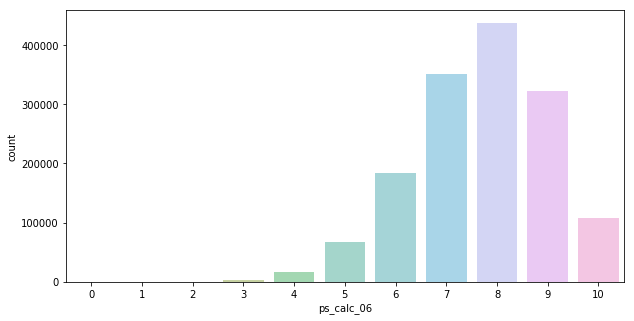

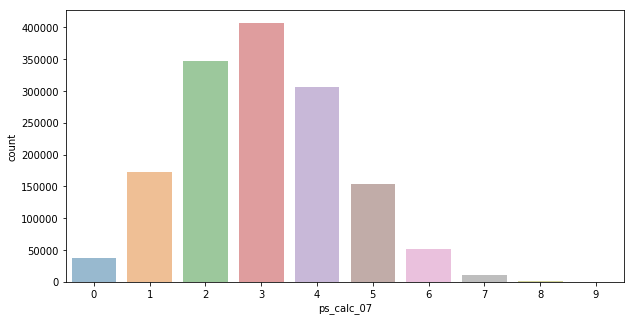

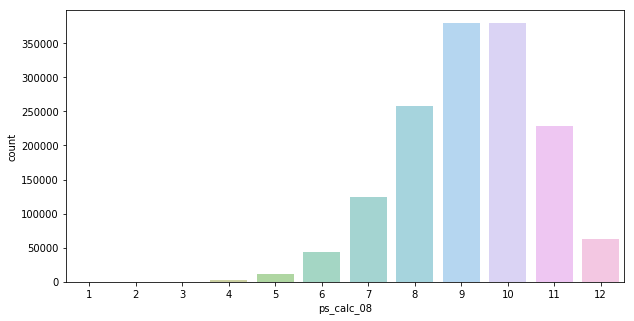

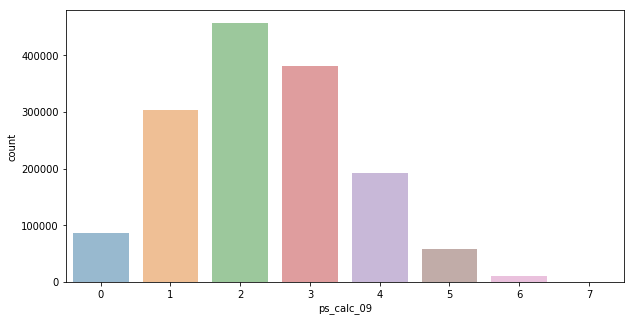

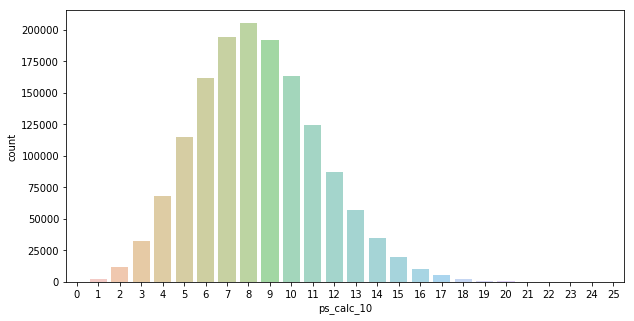

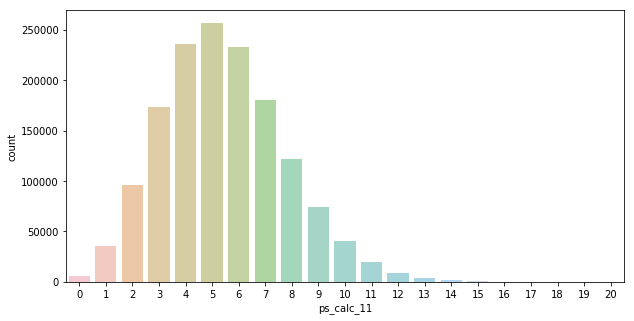

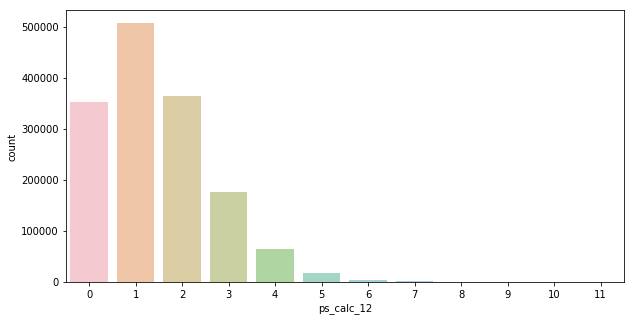

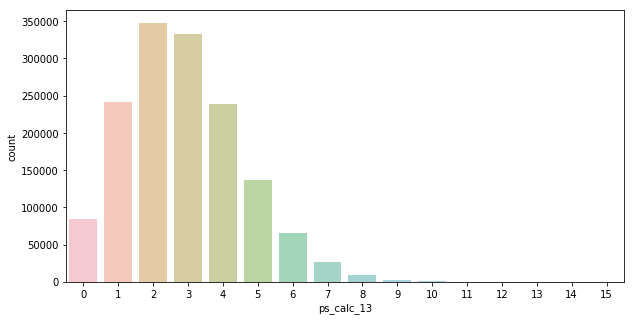

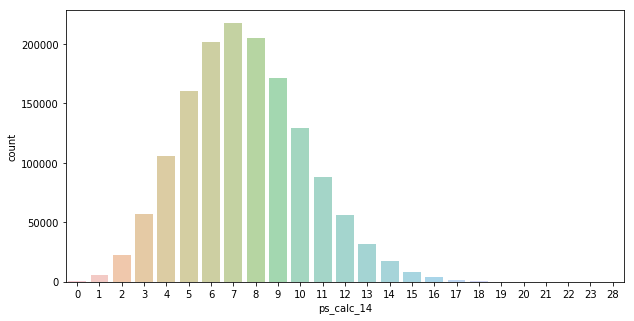

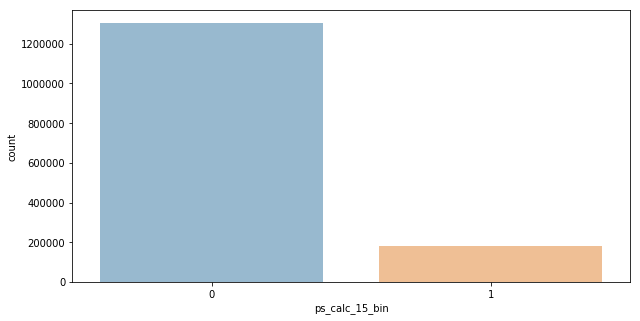

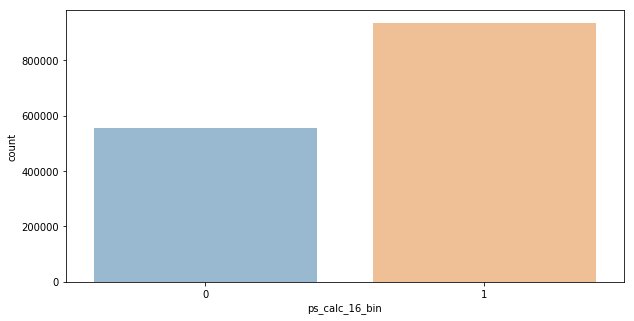

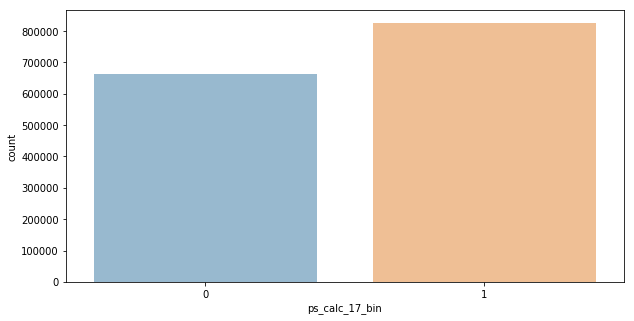

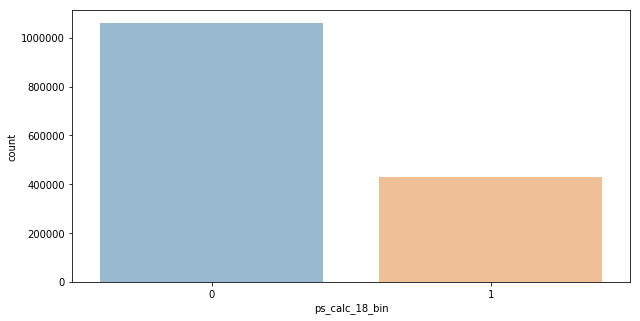

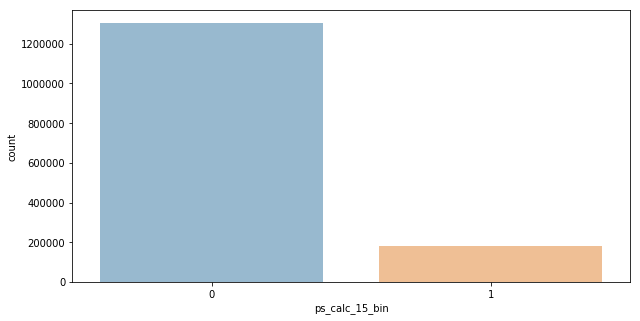

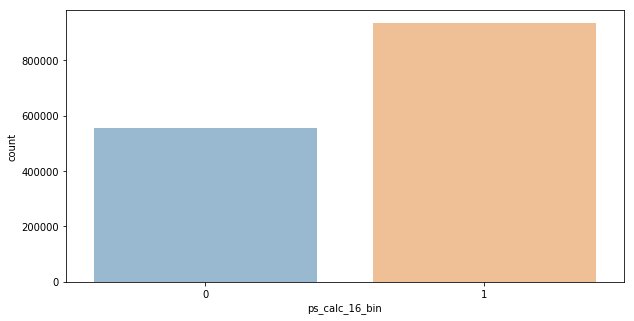

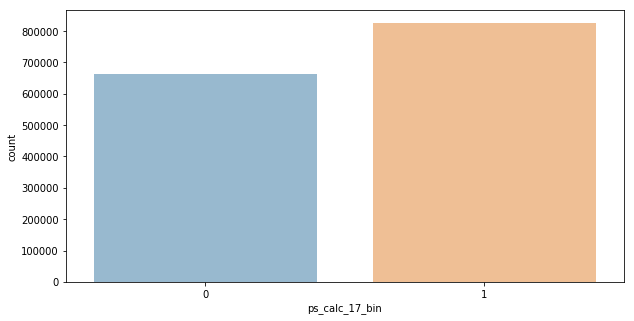

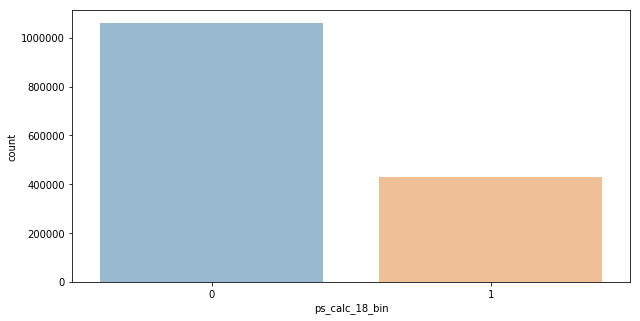

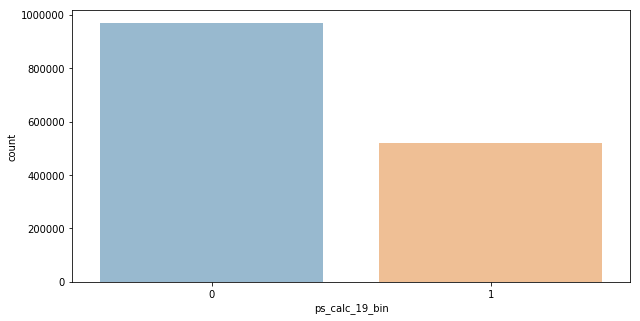

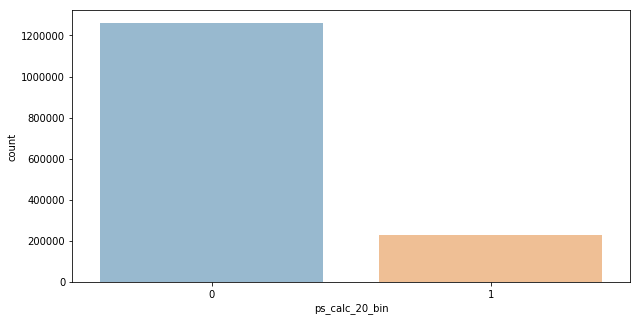

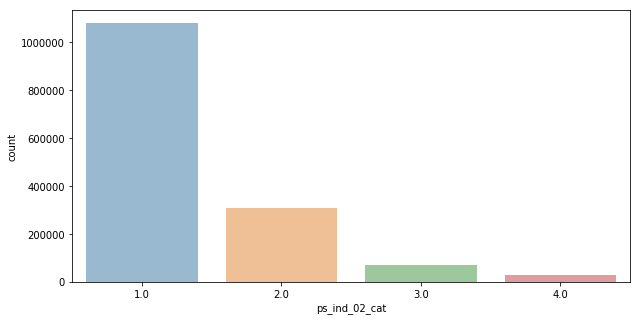

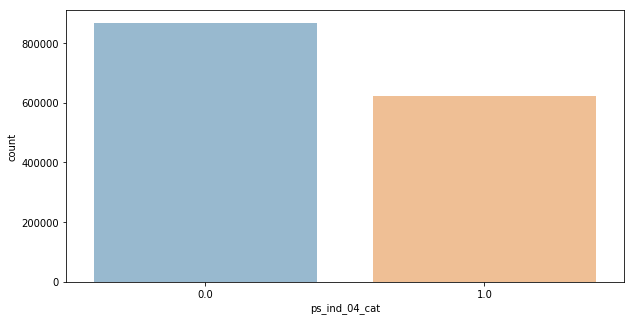

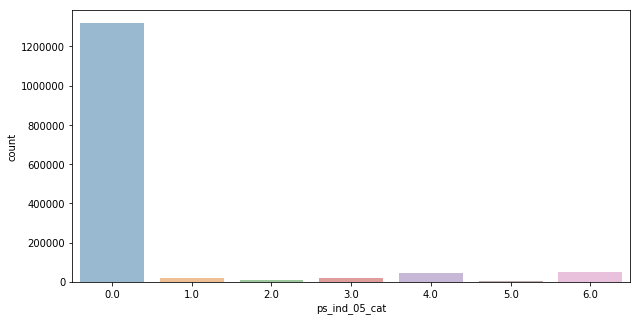

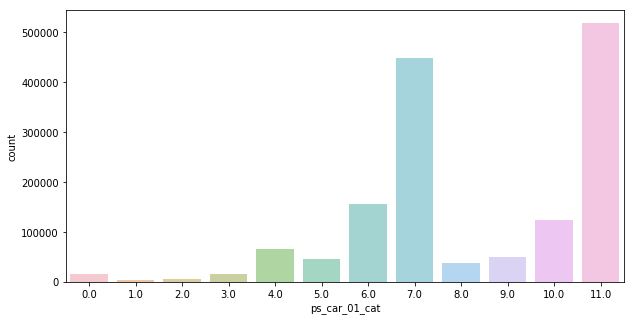

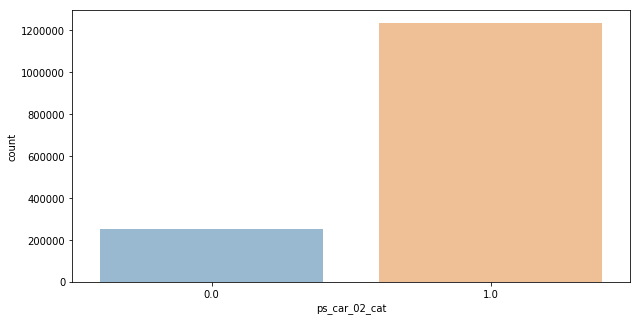

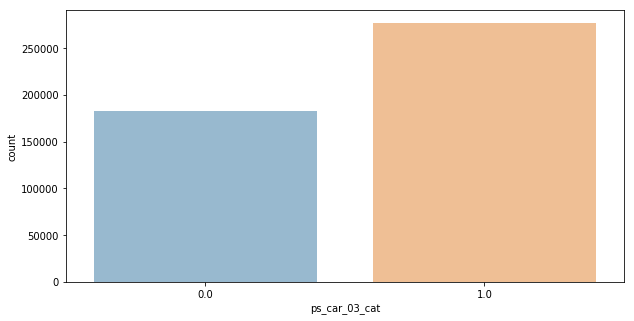

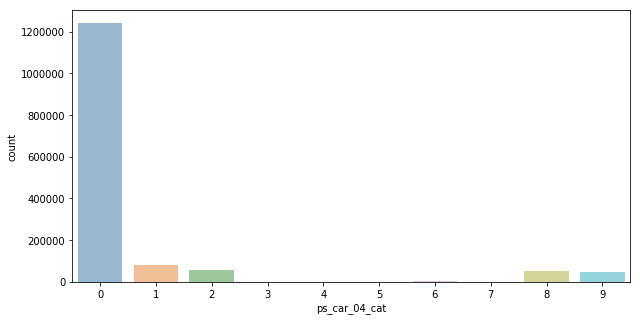

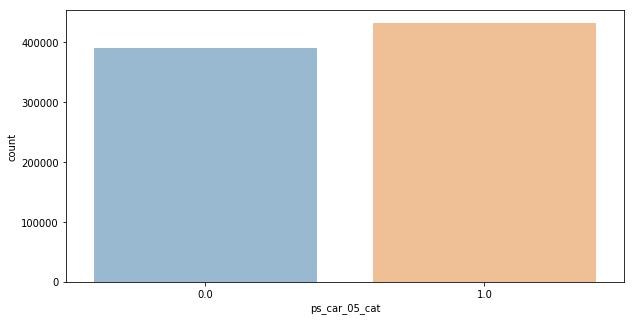

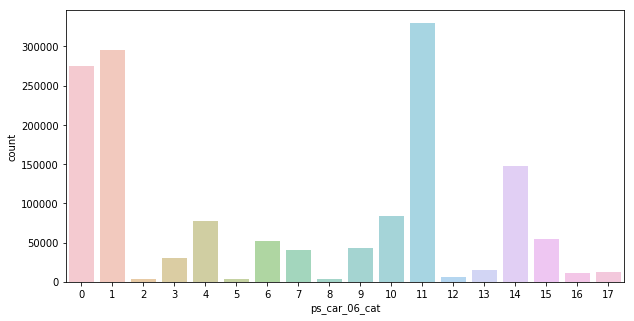

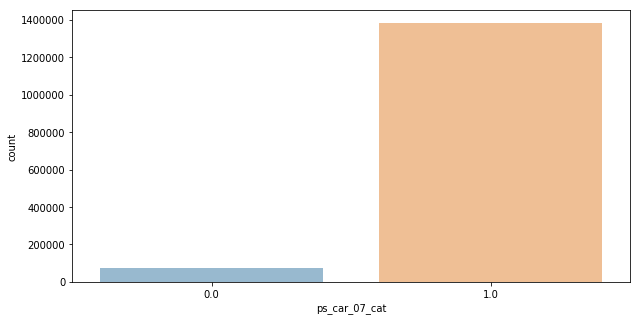

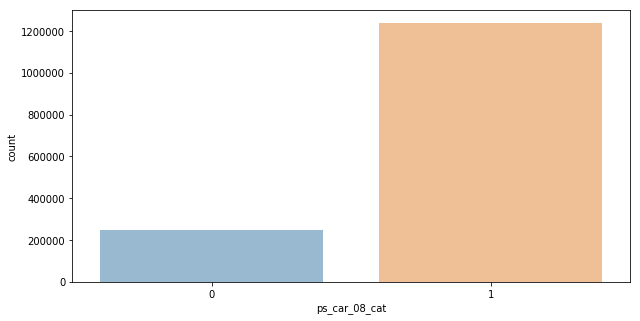

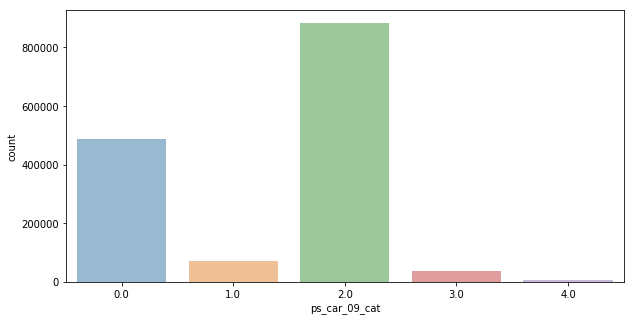

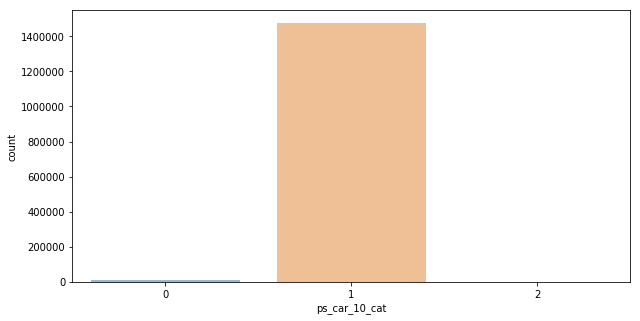

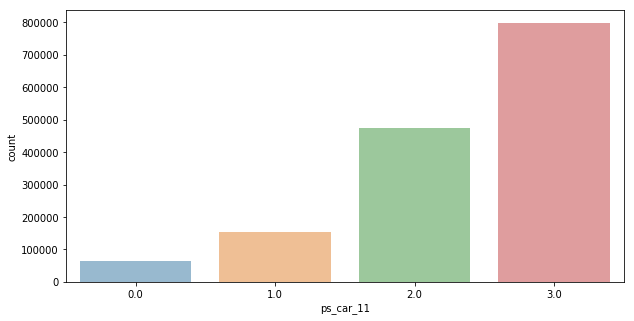

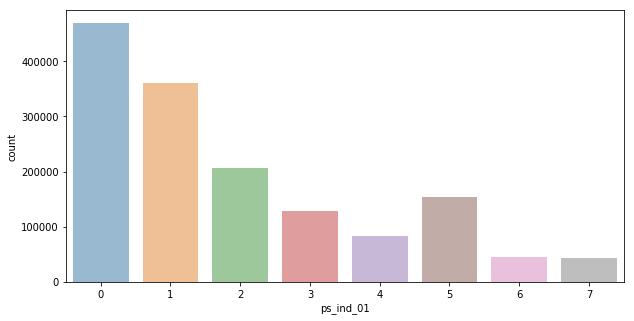

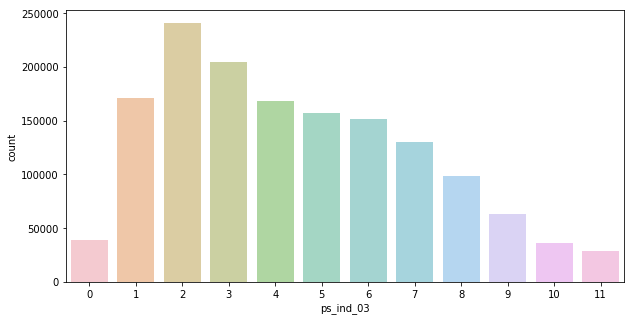

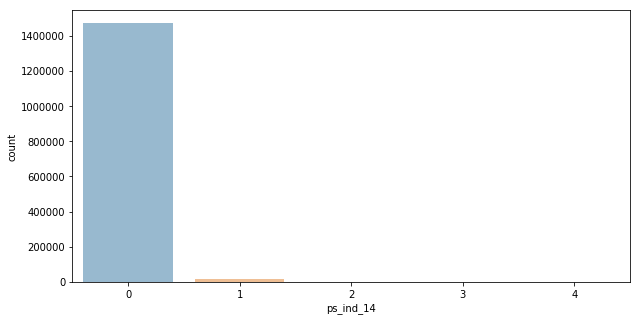

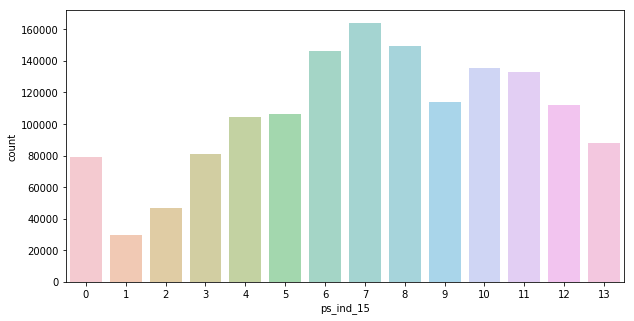

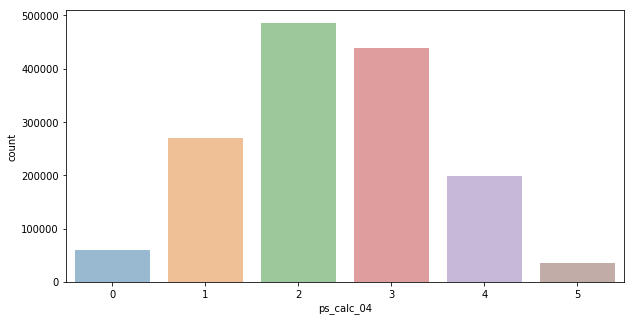

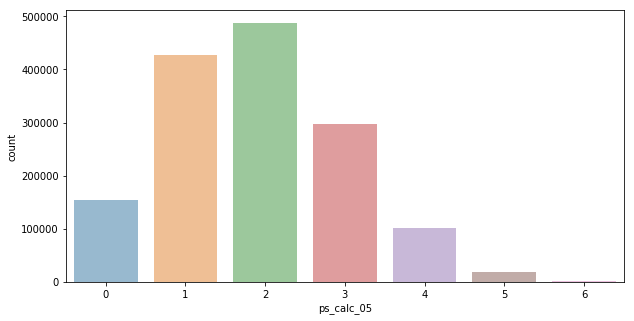

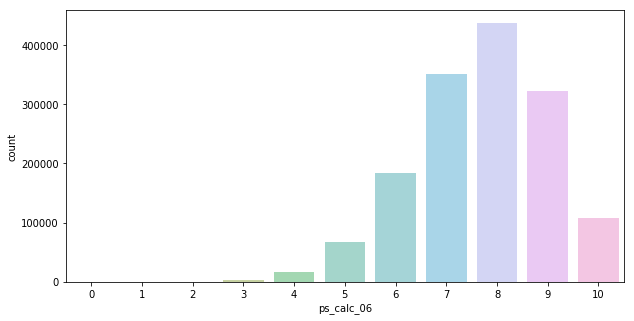

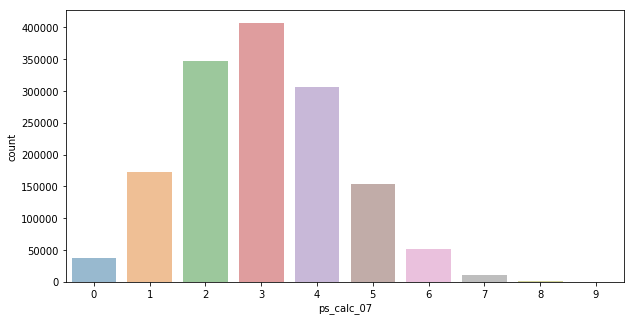

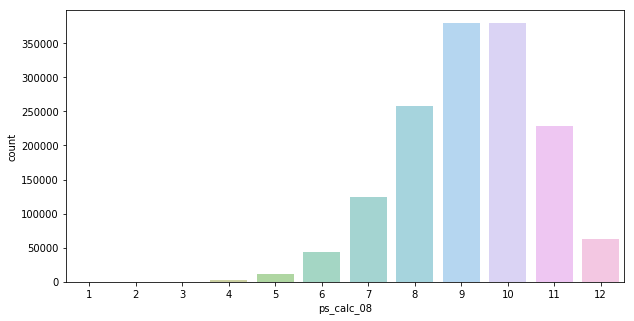

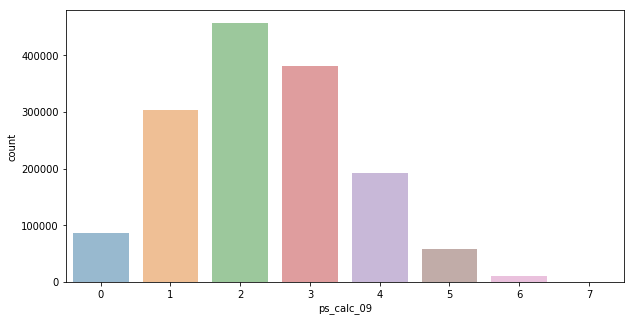

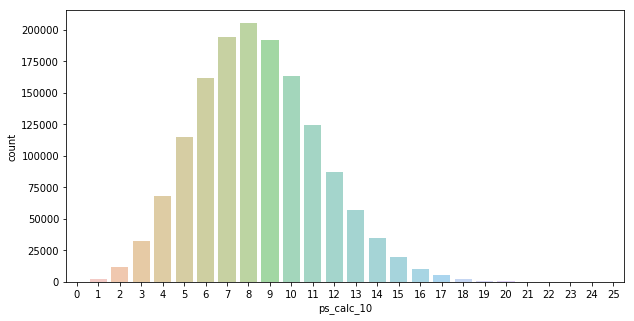

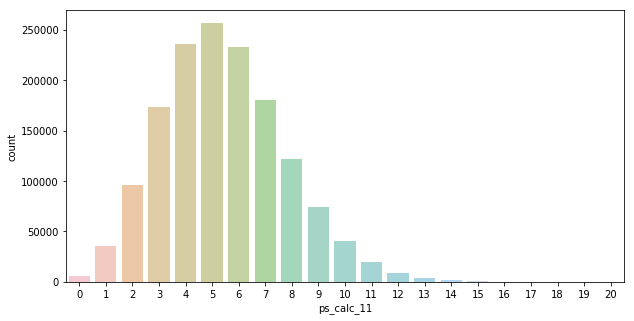

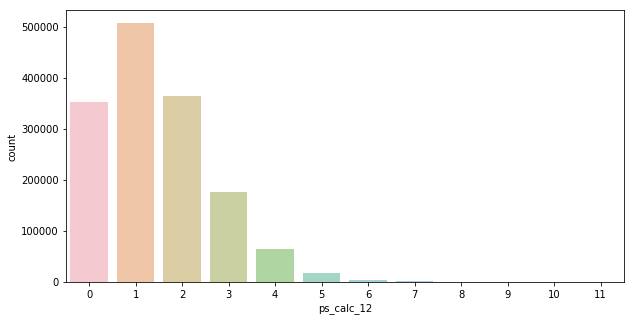

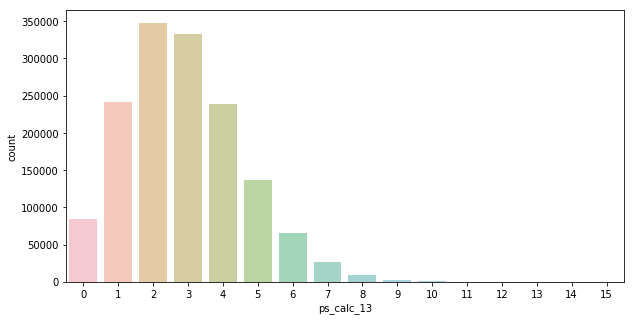

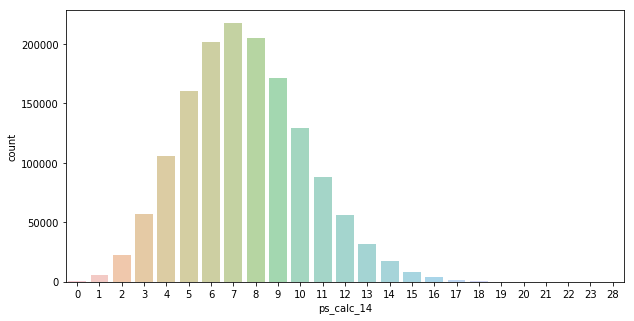

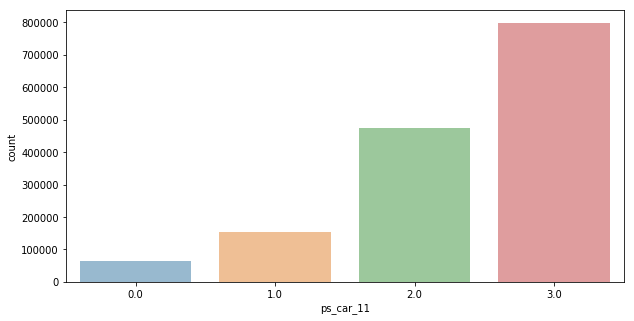

In [13]:
for col in binary+category+integer:
    bar_plot(col, df)

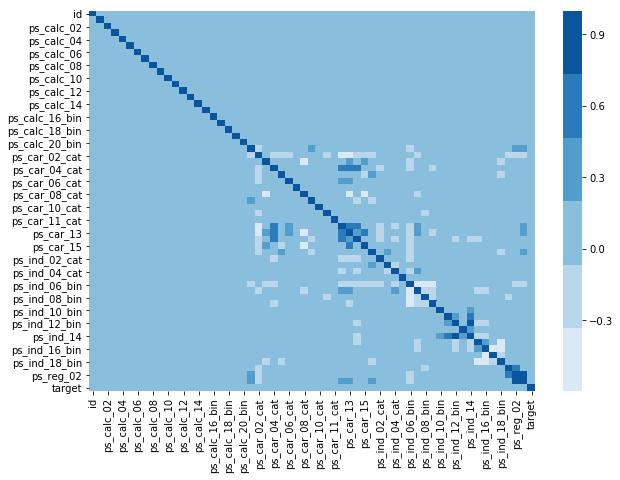

In [14]:
#전체 데이터에 대한 상관관계 HeatMap 시각화
corr=df.corr()
cmap=sns.color_palette('Blues')
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr,cmap=cmap)

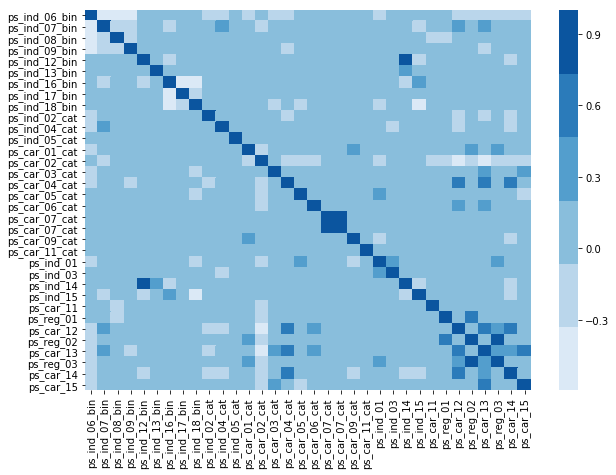

In [16]:
features=['ps_ind_06_bin', 'ps_ind_07_bin','ps_ind_08_bin', 'ps_ind_09_bin','ps_ind_12_bin', 
         'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin','ps_ind_18_bin', 'ps_ind_02_cat',
         'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat',
        'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat','ps_car_07_cat', 'ps_car_07_cat', 
         'ps_car_09_cat','ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15',
        'ps_car_11','ps_reg_01','ps_car_12','ps_reg_02','ps_car_13','ps_reg_03','ps_car_14',
         'ps_car_15']

corr_sub=df[features].corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr_sub,cmap=cmap)